<a href="https://colab.research.google.com/github/TbR777/Dart-OOP_Assignments/blob/master/Thesis_Customised_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path ="/content/drive/MyDrive/Thesis/LungCancer/"

In [ ]:
train_dir = '/content/drive/MyDrive/Thesis_output/train'
test_dir = '/content/drive/MyDrive/Thesis_output/val'

In [ ]:
image_size = (224, 224)  # You can adjust this as needed
batch_size = 32

In [ ]:
# Create data generators for train and test data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Rescale pixel values to [0, 1]
    shear_range=0.2,         # Data augmentation: shear transformation
    zoom_range=0.2,          # Data augmentation: zoom in and out
    horizontal_flip=True,    # Data augmentation: horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change this to 'binary' for binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change this to 'binary' for binary classification
)

Found 876 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [ ]:
# Define your CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer with class count
])

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Include the EarlyStopping callback
)

Epoch 1/100
28/28 [==============================] - 248s 9s/step - loss: 1.6622 - accuracy: 0.4692 - val_loss: 0.9464 - val_accuracy: 0.5611
Epoch 2/100
28/28 [==============================] - 15s 549ms/step - loss: 0.8912 - accuracy: 0.5822 - val_loss: 0.8597 - val_accuracy: 0.5973
Epoch 3/100
28/28 [==============================] - 16s 549ms/step - loss: 0.8344 - accuracy: 0.6256 - val_loss: 0.8093 - val_accuracy: 0.6199
Epoch 4/100
28/28 [==============================] - 15s 548ms/step - loss: 0.7717 - accuracy: 0.6884 - val_loss: 0.7993 - val_accuracy: 0.6923
Epoch 5/100
28/28 [==============================] - 15s 545ms/step - loss: 0.7462 - accuracy: 0.6918 - val_loss: 0.7320 - val_accuracy: 0.6742
Epoch 6/100
28/28 [==============================] - 15s 554ms/step - loss: 0.6907 - accuracy: 0.7192 - val_loss: 0.7257 - val_accuracy: 0.7195
Epoch 7/100
28/28 [==============================] - 15s 551ms/step - loss: 0.6668 - accuracy: 0.7340 - val_loss: 0.6827 - val_accuracy: 0

In [ ]:
import numpy as np

steps = len(test_generator)
test_loss, test_accuracy = model.evaluate(test_generator, steps=steps)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

7/7 [==============================] - 1s 159ms/step - loss: 0.5403 - accuracy: 0.8009
Test Loss: 0.5403487086296082
Test Accuracy: 0.8009049892425537
7/7 [==============================] - 1s 154ms/step


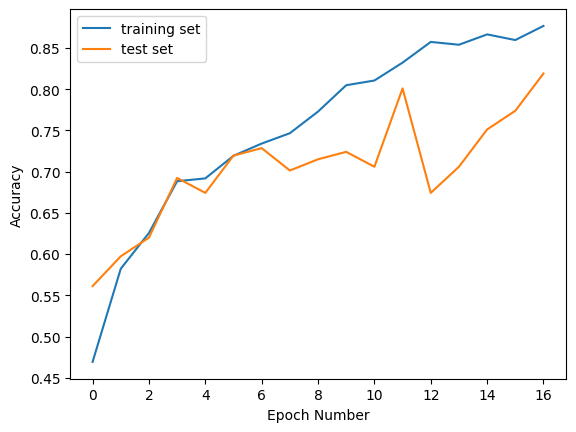

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

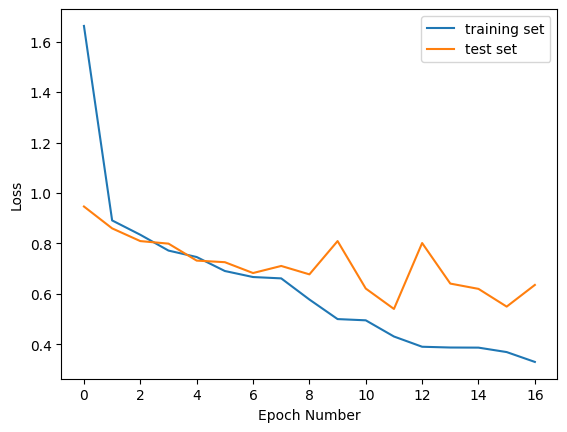

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming test_generator is your test data generator
num_batches = len(test_generator)
batch_size = test_generator.batch_size

true_labels = []
predicted_labels = []
predicted_probs = []

# Generate predictions in batches
for i in range(num_batches):
    data_batch, labels_batch = next(test_generator)

    true_labels.extend(np.argmax(labels_batch, axis=1))  # Extracting class indices without calling numpy()

    predictions_batch = model.predict(data_batch)
    predicted_labels.extend(np.argmax(predictions_batch, axis=1))
    predicted_probs.extend(predictions_batch)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
predicted_probs = np.concatenate(predicted_probs)

class_names = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

1/1 [==============================] - 0s 41ms/step
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       0.83      0.95      0.88        20
Malignant cases       0.99      1.00      1.00       117
   Normal cases       0.99      0.94      0.96        84

       accuracy                           0.97       221
      macro avg       0.94      0.96      0.95       221
   weighted avg       0.98      0.97      0.97       221



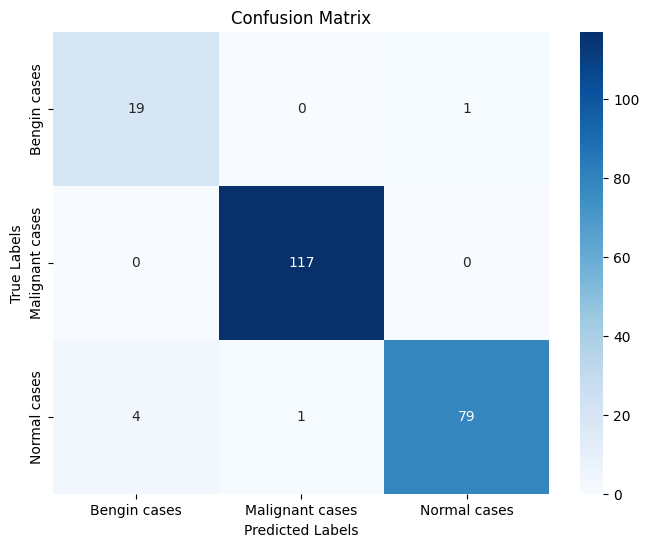

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

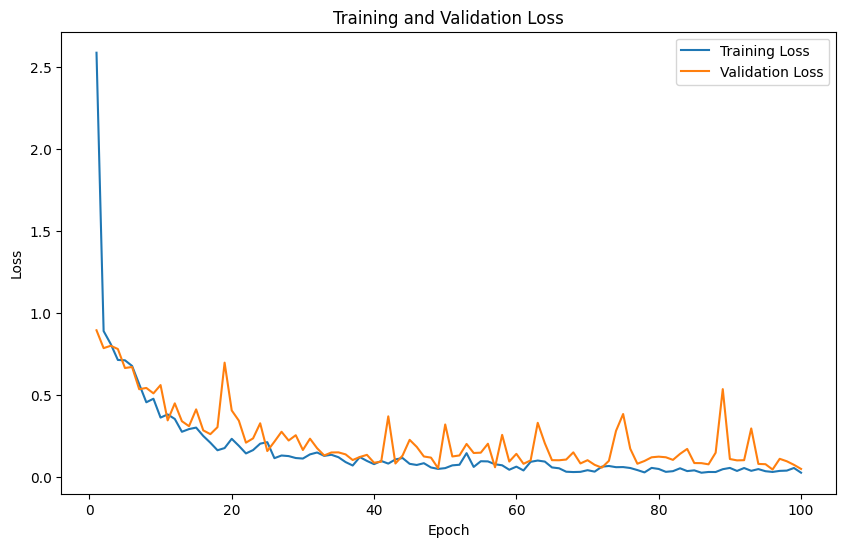

In [ ]:
import matplotlib.pyplot as plt

# Access the training history from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
# You can also access other metrics like accuracy, etc. if you have them.

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

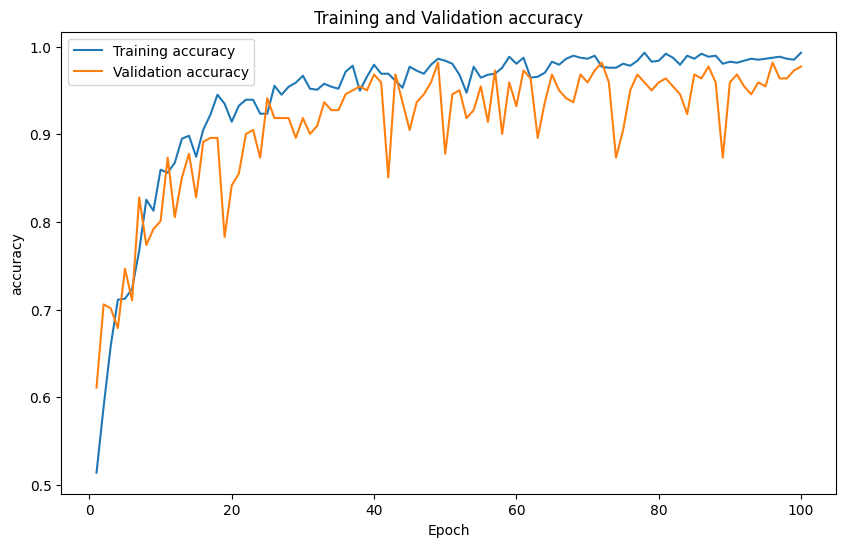

In [ ]:
import matplotlib.pyplot as plt

# Access the training history from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
# You can also access other metrics like accuracy, etc. if you have them.

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 297ms/step


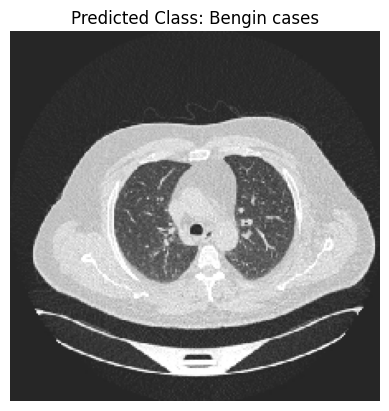

1/1 [==============================] - 0s 47ms/step


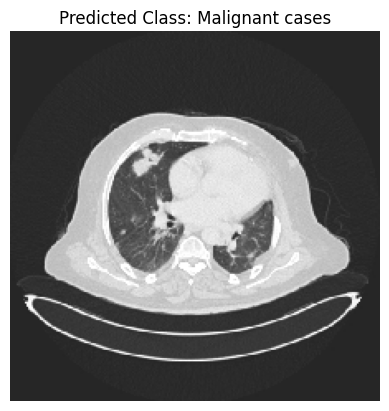

1/1 [==============================] - 0s 36ms/step


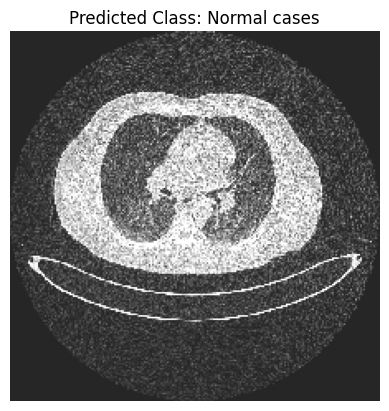

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# List of image paths you want to test
image_paths = [
    '/content/drive/MyDrive/Thesis_output/train/Bengin cases/Bengin case (100).jpg',
    '/content/drive/MyDrive/Thesis_output/train/Malignant cases/Malignant case (103).jpg',
    '/content/drive/MyDrive/Thesis_output/train/Normal cases/Normal case (107).jpg',
    # Add more image paths as needed
]

# Create a function to predict and display results for each image
def predict_image(model, image_path):
    img = image.load_img(image_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    predicted_class_name = class_labels[predicted_class]

    plt.imshow(img)
    plt.axis('off')
    plt.title("Predicted Class: " + predicted_class_name)
    plt.show()

# Iterate through the list of image paths and make predictions
for image_path in image_paths:
    predict_image(model, image_path)

#VGG 16

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adadelta
from keras.optimizers import Nadam
from keras.optimizers import Ftrl
# from keras.optimizers import ProximalSGD
from keras.optimizers import Adamax

In [ ]:
path ="/content/drive/MyDrive/Thesis/LungCancer/"

In [ ]:
train_dir = '/content/drive/MyDrive/Thesis_output/train'
test_dir = '/content/drive/MyDrive/Thesis_output/val'

In [ ]:
image_size = (224, 224)  # You can adjust this as needed
batch_size = 32

In [ ]:
# Create data generators for train and test data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Rescale pixel values to [0, 1]
    shear_range=0.2,         # Data augmentation: shear transformation
    zoom_range=0.2,          # Data augmentation: zoom in and out
    horizontal_flip=True,    # Data augmentation: horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for test data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change this to 'binary' for binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change this to 'binary' for binary classification
)

Found 876 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [ ]:
VGG16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(
                    include_top=False,
                    input_shape=(224,224,3),
                    pooling='avg',
                    classes=3,
                    weights='imagenet'
                   )
for layer in pretrained_model.layers:
        layer.trainable=False

VGG16_model.add(pretrained_model)
VGG16_model.add(Flatten())
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(BatchNormalization())
VGG16_model.add(Dense(3, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
VGG16_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:
# Train the model with early stopping
history = VGG16_model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    #callbacks=[early_stopping]  # Include the EarlyStopping callback
)

Epoch 1/100
28/28 [==============================] - 19s 618ms/step - loss: 0.5900 - accuracy: 0.7774 - val_loss: 0.9161 - val_accuracy: 0.8145
Epoch 2/100
28/28 [==============================] - 19s 691ms/step - loss: 0.2404 - accuracy: 0.9110 - val_loss: 0.8073 - val_accuracy: 0.8552
Epoch 3/100
28/28 [==============================] - 18s 643ms/step - loss: 0.1881 - accuracy: 0.9281 - val_loss: 0.7099 - val_accuracy: 0.8552
Epoch 4/100
28/28 [==============================] - 18s 626ms/step - loss: 0.1289 - accuracy: 0.9475 - val_loss: 0.6652 - val_accuracy: 0.8326
Epoch 5/100
28/28 [==============================] - 17s 626ms/step - loss: 0.1542 - accuracy: 0.9429 - val_loss: 0.5856 - val_accuracy: 0.8235
Epoch 6/100
28/28 [==============================] - 17s 618ms/step - loss: 0.0947 - accuracy: 0.9669 - val_loss: 0.5229 - val_accuracy: 0.8507
Epoch 7/100
28/28 [==============================] - 17s 626ms/step - loss: 0.0967 - accuracy: 0.9669 - val_loss: 0.4459 - val_accuracy:

In [ ]:
import numpy as np

steps = len(test_generator)
test_loss, test_accuracy = VGG16_model.evaluate(test_generator, steps=steps)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = VGG16_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

7/7 [==============================] - 2s 212ms/step - loss: 0.1355 - accuracy: 0.9683
Test Loss: 0.13547298312187195
Test Accuracy: 0.9683257937431335
7/7 [==============================] - 1s 175ms/step


In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming test_generator is your test data generator
num_batches = len(test_generator)
batch_size = test_generator.batch_size

true_labels = []
predicted_labels = []
predicted_probs = []

# Generate predictions in batches
for i in range(num_batches):
    data_batch, labels_batch = next(test_generator)

    true_labels.extend(np.argmax(labels_batch, axis=1))  # Extracting class indices without calling numpy()

    predictions_batch = VGG16_model.predict(data_batch)
    predicted_labels.extend(np.argmax(predictions_batch, axis=1))
    predicted_probs.extend(predictions_batch)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
predicted_probs = np.concatenate(predicted_probs)

class_names = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

1/1 [==============================] - 0s 32ms/step
Classification Report:
                 precision    recall  f1-score   support

   Bengin cases       0.95      0.84      0.89        25
Malignant cases       1.00      1.00      1.00       109
   Normal cases       0.96      0.99      0.97        87

       accuracy                           0.98       221
      macro avg       0.97      0.94      0.96       221
   weighted avg       0.98      0.98      0.98       221



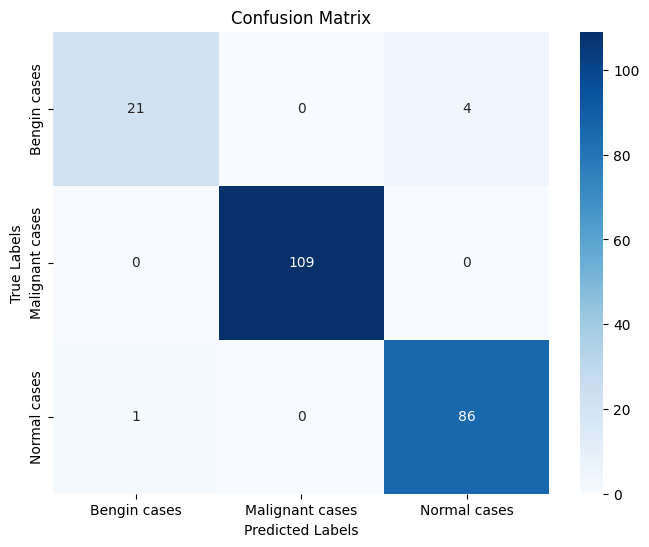

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

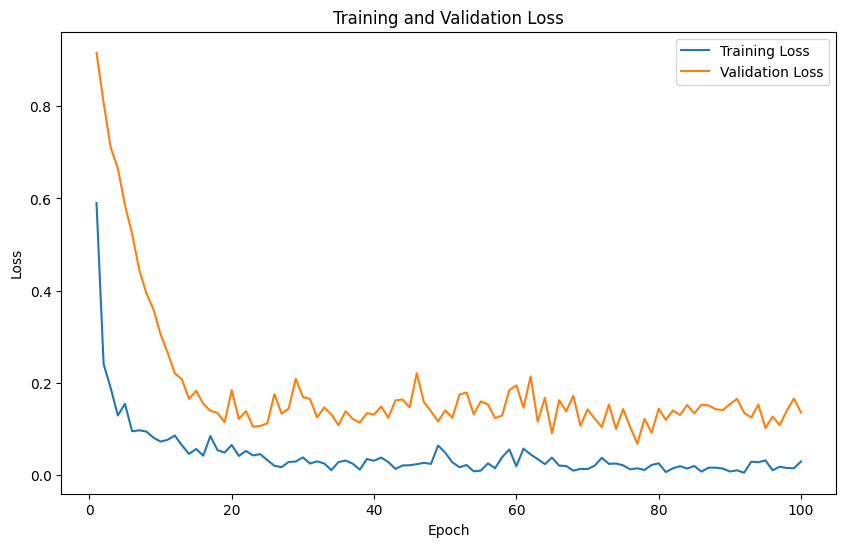

In [ ]:
import matplotlib.pyplot as plt

# Access the training history from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
# You can also access other metrics like accuracy, etc. if you have them.

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

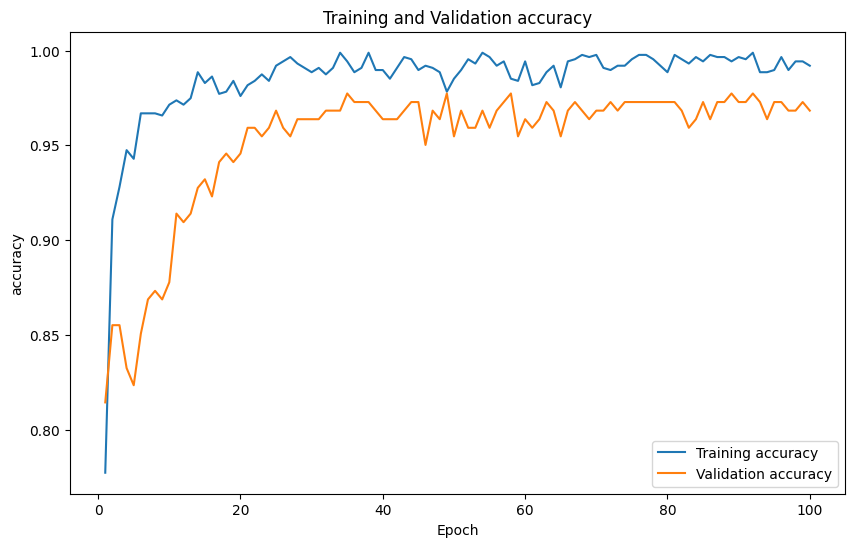

In [ ]:
import matplotlib.pyplot as plt

# Access the training history from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
# You can also access other metrics like accuracy, etc. if you have them.

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

#Resnet34


In [ ]:
train_dir = '/content/drive/MyDrive/Thesis_output/train'
test_dir = '/content/drive/MyDrive/Thesis_output/val'

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
img_width, img_height = 224, 224
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 876 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Add, GlobalAveragePooling2D, Dense

# Define a basic building block for ResNet
def basic_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

In [ ]:
# Define the ResNet-34 architecture
def ResNet34(input_shape=(224, 224, 3), num_classes=1000):
    input_tensor = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = basic_block(x, 64)
    x = basic_block(x, 64)
    x = basic_block(x, 64)

    x = basic_block(x, 128, stride=2)
    x = basic_block(x, 128)
    x = basic_block(x, 128)
    x = basic_block(x, 128)

    x = basic_block(x, 256, stride=2)
    x = basic_block(x, 256)
    x = basic_block(x, 256)
    x = basic_block(x, 256)
    x = basic_block(x, 256)
    x = basic_block(x, 256)

    x = basic_block(x, 512, stride=2)
    x = basic_block(x, 512)
    x = basic_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_tensor, outputs=x)
    return model

In [ ]:
# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust based on your image dimensions
num_classes = 3

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
# Build resnet34 model
ResNet34_model = ResNet34(input_shape, num_classes)

In [ ]:
ResNet34_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = ResNet34_model.fit(
    train_generator,
    epochs=100,  # You can adjust the number of epochs
    validation_data=test_generator
)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Access the training history from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
# You can also access other metrics like accuracy, etc. if you have them.

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Access the training history from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
# You can also access other metrics like accuracy, etc. if you have them.

# Create a plot to visualize the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()

# Transfer learning

In [ ]:
import numpy as np
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
train_dir = '/content/drive/MyDrive/Thesis_output/train'
test_dir = '/content/drive/MyDrive/Thesis_output/val'

In [ ]:
# Image dimensions
img_width, img_height = 224, 224

# Batch size
batch_size = 32

In [ ]:
# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Train and test data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'  # Use 'sparse' for sparse categorical labels
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for sparse categorical labels
    shuffle=False
)


Found 876 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [ ]:
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False)

In [ ]:
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Build the model on top of MobileNetV2
x = base_model.output
x = GlobalMaxPooling2D()(x)  # Use GlobalMaxPooling2D instead of GlobalAveragePooling2D
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='softmax')(x)  # Change to one neuron for sparse categorical
transfer_model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Define new class weights
new_class_weights = {
    0: 2.0,  # Specify the weight for class 0
    1: 1.0,  # Specify the weight for class 1
    2: 1.0   # Specify the weight for class 2
}


In [ ]:
# Compile the model with SparseCategoricalCrossentropy loss and new class weights
transfer_model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [ ]:
# Train the model with new class weights
history = transfer_model.fit(
    train_generator,
    epochs=100,  # You can adjust the number of epochs
    validation_data=test_generator,
    class_weight=new_class_weights
)

Epoch 1/100
28/28 [==============================] - 124s 4s/step - loss: nan - accuracy: 0.1267 - val_loss: nan - val_accuracy: 0.1086
Epoch 2/100
28/28 [==============================] - 17s 611ms/step - loss: nan - accuracy: 0.1096 - val_loss: nan - val_accuracy: 0.1086
Epoch 3/100
28/28 [==============================] - 17s 594ms/step - loss: nan - accuracy: 0.1096 - val_loss: nan - val_accuracy: 0.1086
Epoch 4/100
28/28 [==============================] - 16s 583ms/step - loss: nan - accuracy: 0.1096 - val_loss: nan - val_accuracy: 0.1086
Epoch 5/100
28/28 [==============================] - 19s 683ms/step - loss: nan - accuracy: 0.1096 - val_loss: nan - val_accuracy: 0.1086
Epoch 6/100
28/28 [==============================] - 17s 594ms/step - loss: nan - accuracy: 0.1096 - val_loss: nan - val_accuracy: 0.1086
Epoch 7/100
28/28 [==============================] - 17s 592ms/step - loss: nan - accuracy: 0.1096 - val_loss: nan - val_accuracy: 0.1086
Epoch 8/100
28/28 [=================

In [ ]:
import numpy as np

steps = len(test_generator)
test_loss, test_accuracy = transfer_model.evaluate(test_generator, steps=steps)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predictions = transfer_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)


7/7 [==============================] - 2s 223ms/step - loss: nan - accuracy: 0.1086
Test Loss: nan
Test Accuracy: 0.1085972860455513
7/7 [==============================] - 2s 160ms/step


In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming test_generator is your test data generator
num_batches = len(test_generator)
batch_size = test_generator.batch_size

true_labels = []
predicted_labels = []
predicted_probs = []

In [ ]:
# Generate predictions in batches
for i in range(num_batches):
    data_batch, labels_batch = next(test_generator)

    true_labels.extend(np.argmax(labels_batch, axis=1))  # Extracting class indices without calling numpy()

    predictions_batch = transfer_model.predict(data_batch)
    predicted_labels.extend(np.argmax(predictions_batch, axis=1))
    predicted_probs.extend(predictions_batch)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
predicted_probs = np.concatenate(predicted_probs)

class_names = list(test_generator.class_indices.keys())

# Classification Report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)


AxisError: ignored

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()